In [1]:
#import the libraries[Analyzing data, building a model, or visualizing results]
import pandas as pd

import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
#Collect data and show
data = pd.read_csv("indexData.csv")
data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [3]:
#Clean data by removing null values
data = data.dropna()


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '2018-10-19'),
  Text(0.0, 0, '1965-12-31'),
  Text(20000.0, 0, '1995-01-19'),
  Text(40000.0, 0, '2017-08-14'),
  Text(60000.0, 0, '2019-02-26'),
  Text(80000.0, 0, '2010-08-27'),
  Text(100000.0, 0, '2001-11-21'),
  Text(120000.0, 0, '')])

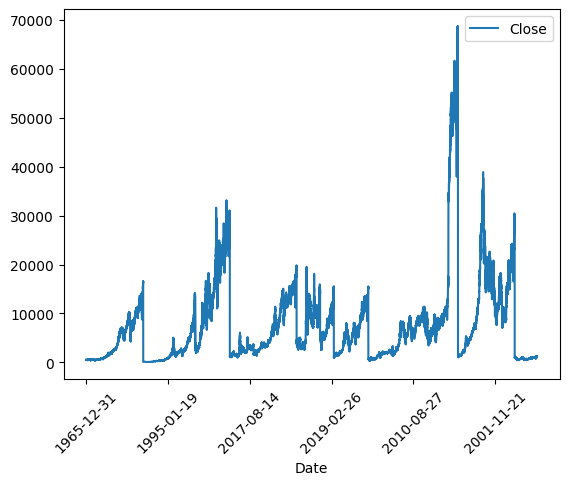

In [6]:
#Showing data visually
data.plot(x = 'Date', y = 'Close')
plt.xticks(rotation = 45)

In [7]:
#create model [RandomForestRegressor is a tool in machine learning that combines many decision-making trees to predict continuous values, like predicting prices or quantities. It's like asking a bunch of experts for their opinions and then averaging them to get a more accurate answer.]
model = RandomForestRegressor()

In [10]:
#Train model [ Using some columns like 'Open', 'High', 'Low', and 'Volume' from dataset as features (X) to predict the 'Close' values (y). The model.fit(X, y) line is where our model learns the patterns in the data to make predictions.]
X = data[['Open','High','Low','Volume']]
X=X[:int(len(data)-1)]
y=data['Close']
y=y[:int(len(data)-1)]
model.fit(X,y)

RandomForestRegressor()

In [12]:
#Test Model
predictions = model.predict(X)
print("The score of the model :",model.score(X,y))

The score of the model : 0.9999944772830093


In [13]:
#Make Predictions between last row of data and new data
new_data = data[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print("The model predict of last row or day to be :",prediction)
print("The Actual value is :",data[['Close']].tail(1).values[0][0])

The model predict of last row or day to be : [1259.91112063]
The Actual value is : 1263.619995
